In [1]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\13615\Downloads\archive\healthcare-dataset-stroke-data.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display basic information and first few rows
data.info()
# Show the first 15 rows and all columns without truncation
pd.set_option('display.max_columns', None)
data.head(15)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [2]:
print(data.columns)


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [3]:
# 1. Handling Missing Values
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

# 2. Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])

# Skipping get_dummies() step as one-hot encoding is already applied

# 3. Normalizing and Standardizing Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'avg_glucose_level', 'bmi']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 4. Dropping Irrelevant Columns
data.drop(['id'], axis=1, inplace=True, errors='ignore')  # errors='ignore' to avoid KeyError if already dropped

# Display cleaned data info and a sample
data.info()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 439.3+ KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,Private,1,2.706375,1.005086,formerly smoked,1
1,0,0.786070,0,0,1,Self-employed,0,2.121559,-0.098981,never smoked,1
2,1,1.626390,0,1,1,Private,0,-0.005028,0.472536,never smoked,1
3,0,0.255342,0,0,1,Private,1,1.437358,0.719327,smokes,1
4,0,1.582163,1,0,1,Self-employed,0,1.501184,-0.631531,never smoked,1


In [4]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Apply one-hot encoding to categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the train and test data to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\13615\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\13615\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\13615\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [6]:
# Initialize and train the model with class weights
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7495107632093934
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.17      0.77      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.93      0.75      0.81      1022



In [7]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train model
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.18      0.71      0.28        62

    accuracy                           0.78      1022
   macro avg       0.58      0.75      0.58      1022
weighted avg       0.93      0.78      0.83      1022



In [8]:
from imblearn.under_sampling import RandomUnderSampler

# Apply under-sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

# Train model
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.79      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.93      0.74      0.81      1022



In [9]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for ROC AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_score)


ROC AUC Score: 0.8493111559139784


In [10]:
# Predict probabilities instead of labels
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Set a custom threshold (try values between 0.3 and 0.7)
threshold = 0.6
y_pred_custom = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
print("Classification Report with Custom Threshold:\n", classification_report(y_test, y_pred_custom))


Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       960
           1       0.18      0.66      0.28        62

    accuracy                           0.80      1022
   macro avg       0.58      0.73      0.58      1022
weighted avg       0.93      0.80      0.85      1022



In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with scaled data
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

print("Classification Report with Scaled Features:\n", classification_report(y_test, y_pred))

Classification Report with Scaled Features:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.17      0.79      0.28        62

    accuracy                           0.75      1022
   macro avg       0.58      0.77      0.56      1022
weighted avg       0.93      0.75      0.81      1022



In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



In [13]:
import pickle

# Save the trained model
with open("stroke_risk_model.pkl", "wb") as file:
    pickle.dump(log_reg, file)


In [14]:
# Check class distribution
import pandas as pd

data = pd.read_csv("C:/Users/13615/Downloads/archive/healthcare-dataset-stroke-data.csv")
print("Class Distribution for Stroke:")
print(data['stroke'].value_counts(normalize=True) * 100)


Class Distribution for Stroke:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [16]:
try:
    check_is_fitted(model)
    print("Model is successfully fitted.")
except:
    print("Model is NOT fitted yet.")

Model is NOT fitted yet.


In [17]:
# Define and train the model with class weight balancing
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model
try:
    model.fit(X_train, y_train)
    print("Model training successful!")
except Exception as e:
    print("Model training failed:", e)

Model training successful!


In [18]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Fill NaN in categorical columns with "Unknown" as a temporary fix
X[['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']] = X[['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']].fillna("Unknown")

# Separate numerical columns explicitly
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Impute categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Imputation and encoding completed successfully.")



Imputation and encoding completed successfully.


In [19]:
print("Missing values after imputation:")
print(X.isnull().sum())


Missing values after imputation:
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_1                          0
gender_2                          0
ever_married_1                    0
Residence_type_1                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Define features and target
X = data.drop(['stroke', 'id'], axis=1)
y = data['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define columns
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Impute categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Apply one-hot encoding
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Align columns of train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Check if NaNs are still present
print("Missing values in X_train:")
print(X_train.isnull().sum().sum())
print("Missing values in X_test:")
print(X_test.isnull().sum().sum())



Missing values in X_train:
0
Missing values in X_test:
0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define features and target
X = data.drop(['stroke', 'id'], axis=1)
y = data['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define columns
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Impute categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Align train and test sets to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("SMOTE applied successfully.")



SMOTE applied successfully.


In [ ]:
1. What are the major risk factors for stroke?

C:\Users\13615\AppData\Local\Temp\ipykernel_23444\453499517.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


Correlation Matrix for Stroke Risk Factors:
                                      id    gender       age  hypertension  \
id                              1.000000  0.001929  0.003538      0.003550   
gender                          0.001929  1.000000 -0.027752      0.021223   
age                             0.003538 -0.027752  1.000000      0.276398   
hypertension                    0.003550  0.021223  0.276398      1.000000   
heart_disease                  -0.001296  0.085685  0.263796      0.108306   
ever_married                    0.013690 -0.030171  0.679125      0.164243   
Residence_type                 -0.001403 -0.006105  0.014180     -0.007913   
avg_glucose_level               0.001092  0.054722  0.238171      0.174474   
bmi                             0.005555 -0.026452  0.324296      0.158293   
stroke                          0.006388  0.009081  0.245257      0.127904   
work_type_Never_worked          0.005459  0.011486 -0.078653     -0.021608   
work_type_Private   

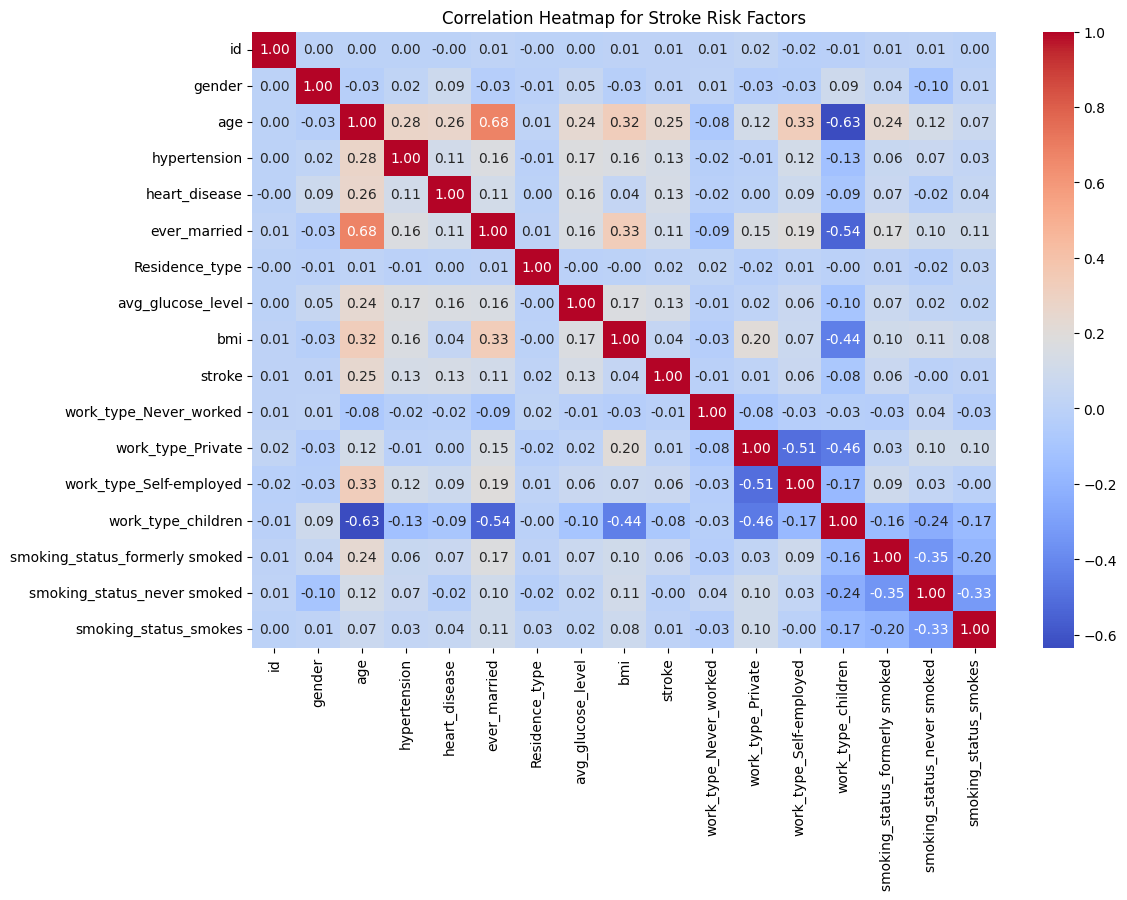

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("C:/Users/13615/Downloads/archive/healthcare-dataset-stroke-data.csv")

# Fill missing BMI values
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# Convert categorical variables to numeric
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})
data['Residence_type'] = data['Residence_type'].map({'Urban': 1, 'Rural': 0})

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['work_type', 'smoking_status'], drop_first=True)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Print correlation matrix to the console
print("Correlation Matrix for Stroke Risk Factors:")
print(correlation_matrix)

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap for Stroke Risk Factors")

# Save Heatmap first
plt.savefig("correlation_heatmap_stroke_risk.png", dpi=300, bbox_inches='tight')  
plt.show()  # Show Heatmap


In [ ]:
2. How do health and lifestyle factors interact to influence stroke risk?

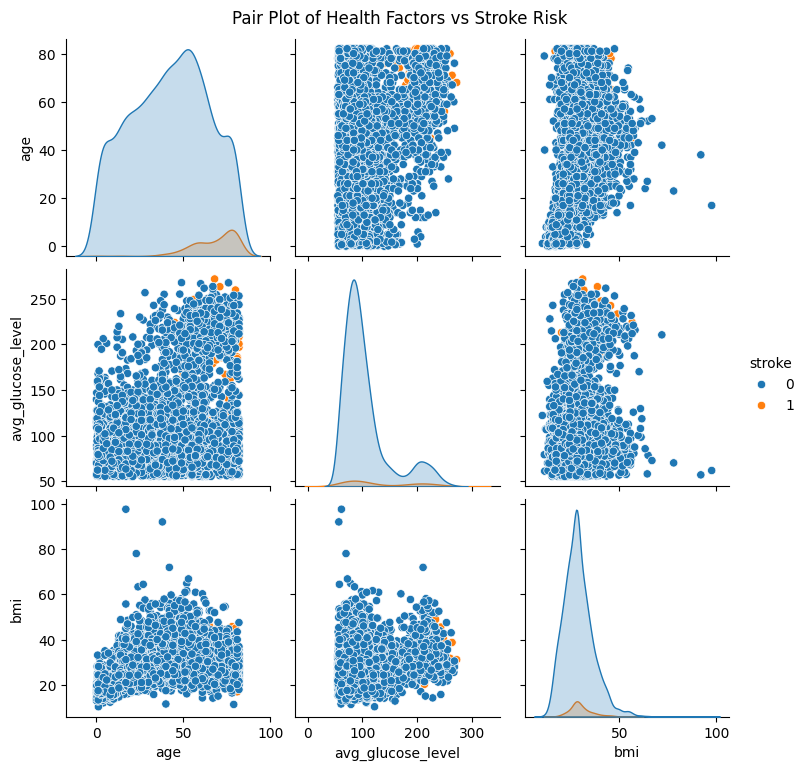

Basic Statistics for Selected Health Factors:
               age  avg_glucose_level          bmi       stroke
count  5110.000000        5110.000000  5110.000000  5110.000000
mean     43.226614         106.147677    28.862035     0.048728
std      22.612647          45.283560     7.699562     0.215320
min       0.080000          55.120000    10.300000     0.000000
25%      25.000000          77.245000    23.800000     0.000000
50%      45.000000          91.885000    28.100000     0.000000
75%      61.000000         114.090000    32.800000     0.000000
max      82.000000         271.740000    97.600000     1.000000


In [15]:
# Create a pairplot
pair_plot = sns.pairplot(data, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])
pair_plot.fig.suptitle("Pair Plot of Health Factors vs Stroke Risk", y=1.02)  # Add title

# Save the plot before showing it
pair_plot.savefig("pairplot_stroke_risk.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print basic statistics for the variables being plotted
print("Basic Statistics for Selected Health Factors:")
print(data[['age', 'avg_glucose_level', 'bmi', 'stroke']].describe())


In [ ]:
3. Can we accurately predict stroke risk using available data?

Accuracy: 0.7495107632093934
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.17      0.77      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.93      0.75      0.81      1022



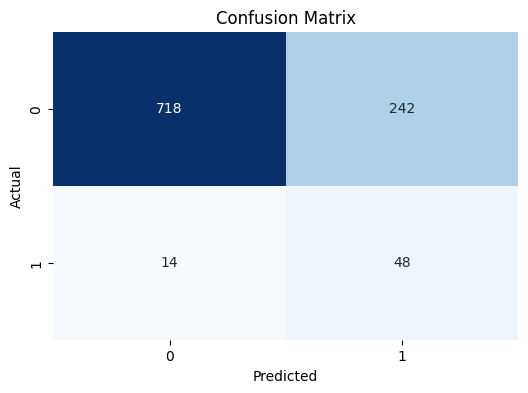

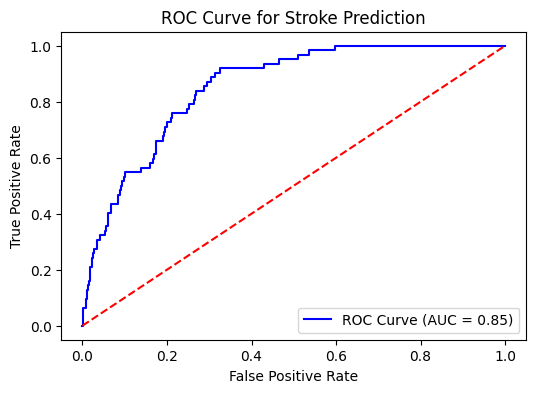

C:\Users\13615\AppData\Local\Temp\ipykernel_23444\3817213937.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=feature_names, orient='h', palette='viridis')


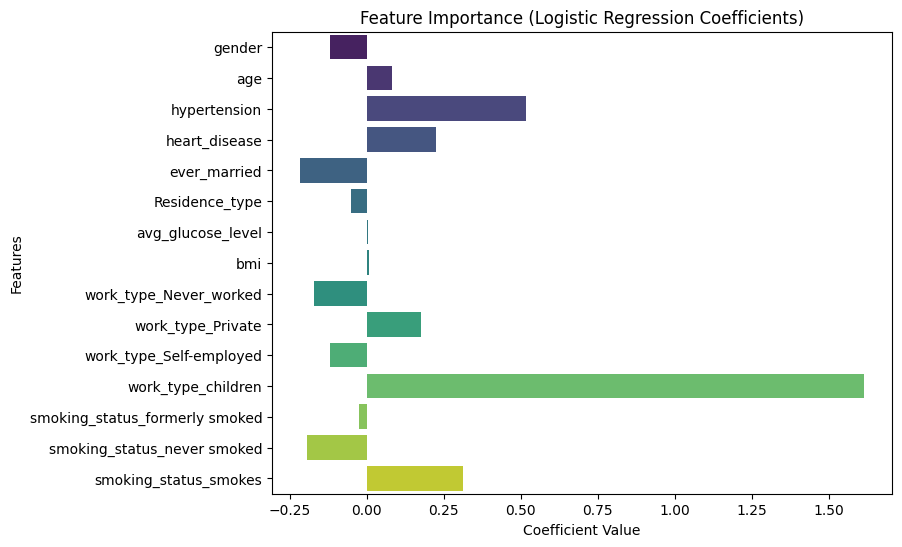

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve for Stroke Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Feature Importance (Coefficients Plot)
feature_names = data.drop(['stroke', 'id'], axis=1).columns
coefficients = model.coef_[0]

plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients, y=feature_names, orient='h', palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()



In [28]:
4. Can the model recommend strategies to reduce stroke risk?

Object `risk` not found.


                           Feature  Importance
11              work_type_children    1.385521
2                     hypertension    0.516606
3                    heart_disease    0.295769
13     smoking_status_never smoked    0.249994
14           smoking_status_smokes    0.217688
9                work_type_Private    0.156006
8           work_type_Never_worked    0.155108
10         work_type_Self-employed    0.117808
0                           gender    0.110954
12  smoking_status_formerly smoked    0.104308
5                   Residence_type    0.099605
1                              age    0.079859
4                     ever_married    0.039934
7                              bmi    0.009589
6                avg_glucose_level    0.003816


C:\Users\13615\AppData\Local\Temp\ipykernel_23444\3861570213.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


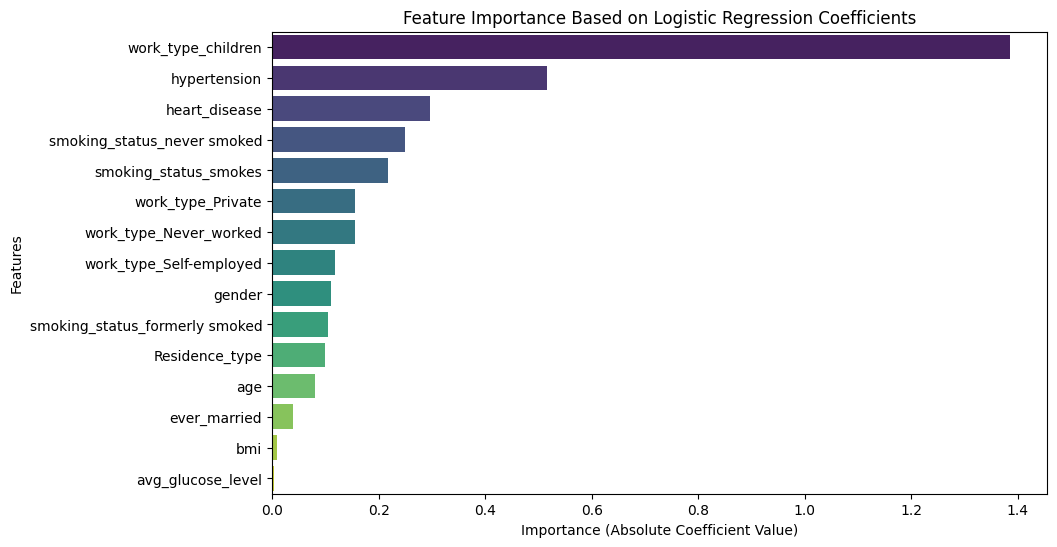

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Extract features and target assuming 'data' is the original DataFrame
X = data.drop(['stroke', 'id'], axis=1).copy()  # Ensure X is a DataFrame
y = data['stroke']

# Save the original DataFrame column names before imputation
original_columns = X.columns  # Save column names

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame with original column names
X_imputed = pd.DataFrame(X_imputed, columns=original_columns)

# Train model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_imputed, y)

# Extract feature importance
feature_importance = abs(model.coef_[0])

# Create DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': original_columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

# Visualize and Save Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance Based on Logistic Regression Coefficients")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Features")
plt.savefig("feature_importance_logistic_regression.png", dpi=300, bbox_inches='tight')
plt.show()



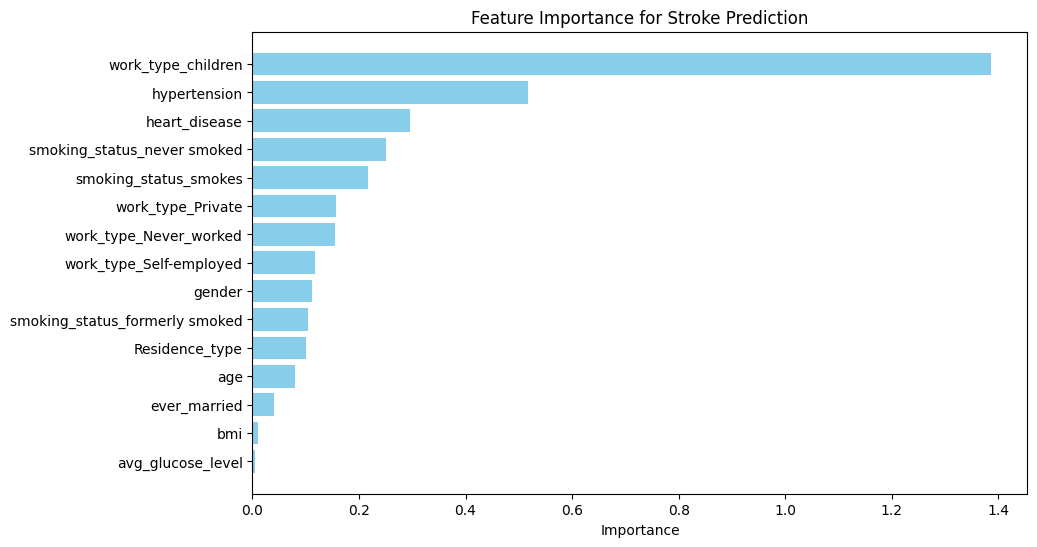

In [7]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Feature Importance for Stroke Prediction')
plt.xlabel('Importance')
plt.show()


C:\Users\13615\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


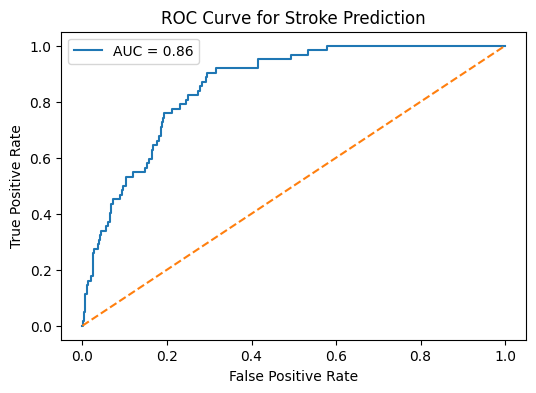

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[::, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve for Stroke Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


C:\Users\13615\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


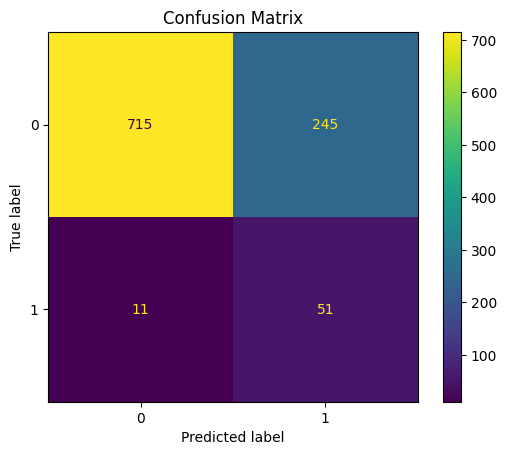

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\13615\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


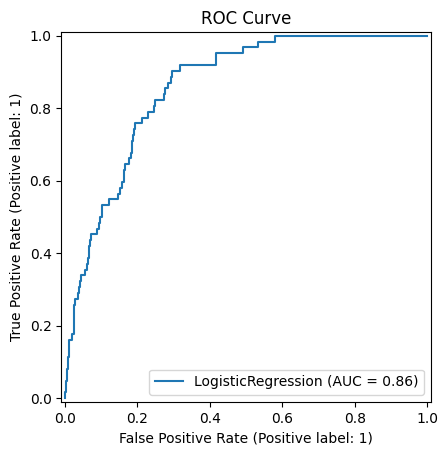

In [34]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()


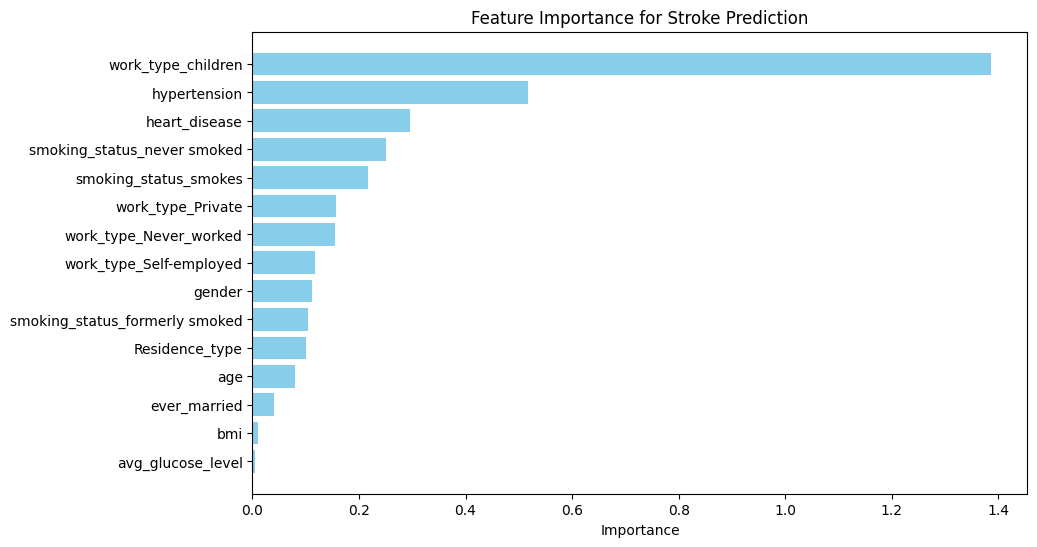

In [35]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance for Stroke Prediction')
plt.xlabel('Importance')

# Save the plot
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()


In [36]:
# Import XGBoost library
from xgboost import XGBClassifier

# Define XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Add to the models dictionary
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'XGBoost': xgb}

print("XGBoost model trained successfully.")


XGBoost model trained successfully.


C:\Users\13615\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:21:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


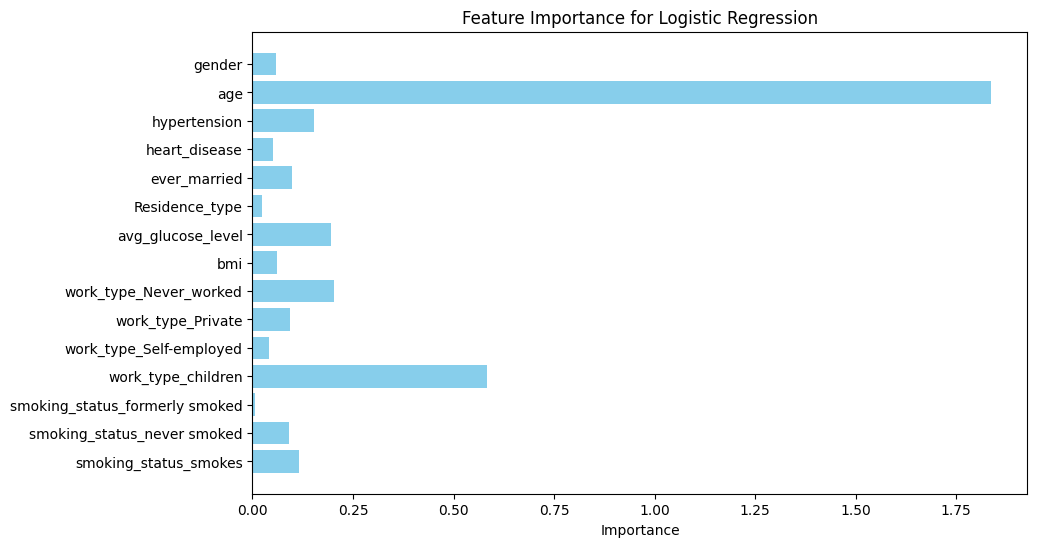

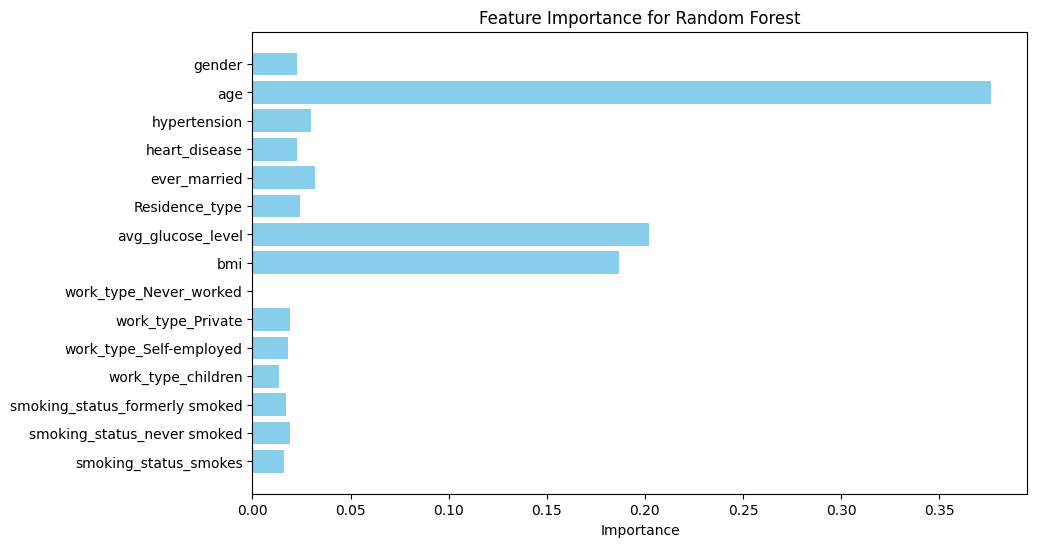

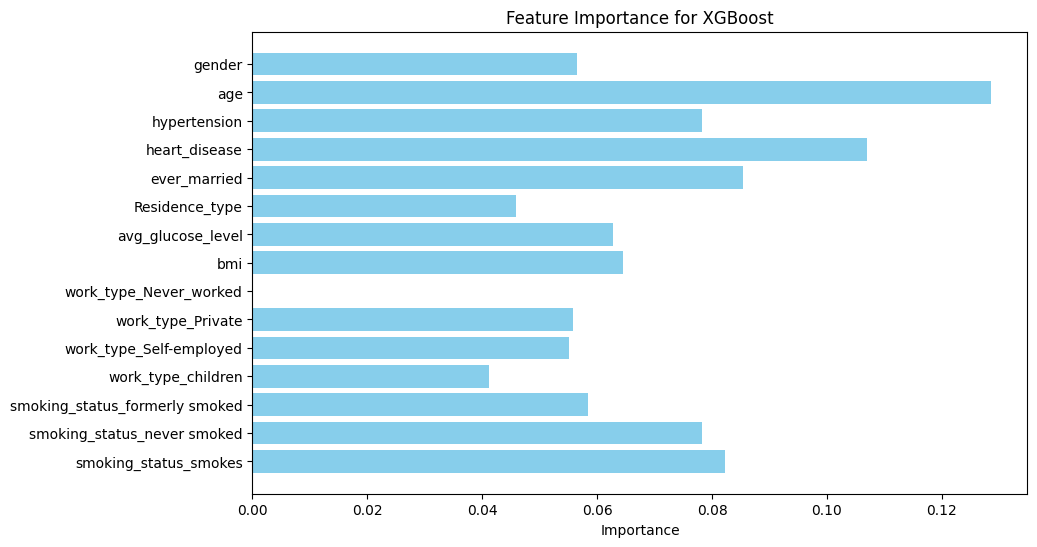

In [37]:
for model_name, model in models.items():
    # Create a plot for each model
    plt.figure(figsize=(10, 6))
    
    # Use appropriate attribute for feature importance
    if model_name == 'XGBoost' or model_name == 'Random Forest':
        # For XGBoost and Random Forest
        importance = model.feature_importances_
    else:
        # For Logistic Regression
        importance = abs(model.coef_[0])
    
    # Plot feature importance
    plt.barh(original_columns, importance, color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    
    # Save the plot
    plt.savefig(f"{model_name.replace(' ', '_')}_feature_importance.png", dpi=300, bbox_inches='tight')
    plt.show()

